# k arm bandit 

this notebook is an attmpt to create a k armed bandit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#set variables
k = 10
reward_range_min = 5
reward_range_max = 10
std_min = 1
std_max = 8
samples_per_distrib = 10000



In [3]:
#create arms and rewards
reward_stack = []

for i in range(0,k):
    #select mean for this arm
    current_mean = np.random.choice(a = range(reward_range_min,reward_range_max+1), size = 1)
    #to debug
    #print(current_mean)
    
    #select std for this arm
    current_std = np.random.choice(a = range(std_min,std_max+1), size = 1)
    #to debug
    #print(current_std)
    
    #draw samples for this arm
    current_arm = np.random.normal(loc = current_mean, scale = current_std, size = samples_per_distrib)
    #to debug
    #print(current_arm)
    
    #append to reward stack list 
    reward_stack.append(current_arm)
    #to debug
    #print(reward_stack)
    

{'bodies': [<matplotlib.collections.PolyCollection at 0x11362a9aac0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x11362a9a8b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x11362ac74c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x11362ac7940>,
 'cbars': <matplotlib.collections.LineCollection at 0x11362ac7dc0>,
 'cmedians': <matplotlib.collections.LineCollection at 0x11362ad4280>}

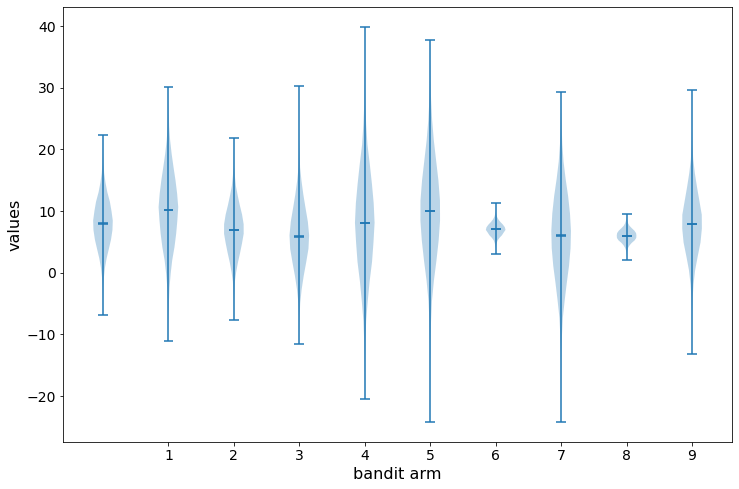

In [4]:
#alter plot size so it looks decent
#makes viz bigger
import matplotlib.pyplot as plt
BIG = 16
MED = 14
SMALL = 10
plt.rcParams.update({'font.size': BIG})
plt.rcParams.update({'axes.labelsize': BIG})
plt.rcParams.update({'xtick.labelsize': MED})
plt.rcParams.update({'ytick.labelsize': MED})
plt.rcParams.update({'figure.figsize':[12, 8]}) #this is important as it makes the visualizations much easier to read and clip/export!(w,h)

#plot reward stack and arms
plt.xticks(ticks=list(range(1,k+1)), labels=list(range(1,k+1)))

plt.xlabel("bandit arm")

plt.ylabel("values")

plt.violinplot(reward_stack, list(range(0,k)), points=20, widths=0.3,
                     showmeans=True, showextrema=True, showmedians=True)



In [5]:
list(range(0,k))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
#random selection without any value assesments

#set base vars
n = 10000

#set objects needed
arms_selected = []
total_reward = 0

for i in range(0,n):
    
    #randomly pick an arm
    current_arm = np.random.choice(range(0,k))
    
    #append choice to list tracking what was done
    arms_selected.append(current_arm)
    
    #randomly pick a reward from the distrib
    current_reward = np.random.choice(reward_stack[current_arm])
    
    #add current reward to total rewards
    total_reward = total_reward + current_reward
    

print("total reward from random selection:",total_reward)
print(pd.Series(arms_selected).value_counts(normalize = True).sort_index())

total reward from random selection: 75518.77546591994
0    0.0972
1    0.1008
2    0.0981
3    0.0999
4    0.1043
5    0.0972
6    0.0984
7    0.1048
8    0.1059
9    0.0934
dtype: float64


In [7]:
#epsilon greedy solution

#set base vars
n = 10000

#set objects needed
arms_selected = []
reward_list = [[] for i in list(range(0,k))]
total_reward = 0

#some helper functions

#pull the arm selected
def pull_arm(current_arm):
    
    current_reward = np.random.choice(reward_stack[current_arm])
    
    return current_reward

#get max for each arm (argmax a Q t (a))
#used for greedy approach
def arm_max(reward_list):
    
    #get mean for each arms known rewards
    maxs = np.array([np.mean(i) for i in reward_list])
    
    #pick max known rewards
    maxx = maxs.argsort()
    
    return maxx[-1]

#when epsilon is used for exploration
#select arm that has been selected the least number of times, random (not selecting the max arm)
def arm_explore(reward_list, arms_selected):
         
    #get the number of times each arm has been selected
    arm_breakdown = np.array(pd.Series(arms_selected).value_counts(normalize = False).sort_index())
    
    #check if first two are equal
    sorted_arm_indices = arm_breakdown.argsort()
    
    #debug
    #print(arm_breakdown)
    #print(sorted_arm_indices)
    #print("0:",arm_breakdown[sorted_arm_indices[0]])
    #print("1:",arm_breakdown[sorted_arm_indices[1]])
    
    #if first do not have equal counts then return lowest count
    if arm_breakdown[sorted_arm_indices[0]] != arm_breakdown[sorted_arm_indices[1]]:
        return sorted_arm_indices[0]
            
    #take random sample
    max_arm = arm_max(reward_list)
    
    rando_list = [i for i in range(0,k)]
    
    rando_list.remove(max_arm)
    
    selected_element = np.random.choice(rando_list)
    
    return selected_element

#use epsilon to make explouit or explore decision:
def exploit_or_explore():
    
    exp = np.random.binomial(1, epsilon, 1)
    
    return exp

#play one turn
def play_one(reward_list, arms_selected, total_reward):
    
    if epsilon > 0:
    
        #get explore/exploit signal
        exp = exploit_or_explore()
        
    else:
        exp = 0
    
    #explore
    if exp:
        current_arm = arm_explore(reward_list, arms_selected)
    
    #exploit
    else:
        current_arm = arm_max(reward_list)
        
    #pull the arm
    current_reward = pull_arm(current_arm)
    
    #append reward to reward_list
    reward_list[current_arm].append(current_reward)
    
    #append arms selected to tracking
    arms_selected.append(current_arm)
    
    #update total reward
    total_reward = total_reward + current_reward
    
    return reward_list, arms_selected, total_reward

#play thru
def play_the_bandit(reward_list, arms_selected, total_reward, n):

    
    #for first k rounds pull each arm available once to get started    
    for i in range(0,k):
        #debug
        #print(i)
        
        current_reward = pull_arm(i)
        
        #append reward to reward_list
        reward_list[i].append(current_reward)
    
        #append arms selected to tracking
        arms_selected.append(i)
    
        #update total reward
        total_reward = total_reward + current_reward
     
    #play thru remaining rounds
    for i in range(10,n):
        #debug
        #print(i)
    
        #start the process using epsilon greedy
        reward_list, arms_selected, total_reward = play_one(reward_list, arms_selected, total_reward)  
        
    return reward_list, arms_selected, total_reward

In [11]:
#set base vars
n = 10000
epsilon = 0.1

#set objects needed
arms_selected = []
reward_list = [[] for i in list(range(0,k))]
total_reward = 0

reward_list, arms_selected, total_reward = play_the_bandit(reward_list, arms_selected, total_reward, n)

print("total reward from epsilon greedy:",total_reward)
print(pd.Series(arms_selected).value_counts(normalize = True).sort_index())
print(pd.Series(arms_selected).value_counts(normalize = False).sort_index())

total reward from epsilon greedy: 97808.54178823855
0    0.0121
1    0.8906
2    0.0119
3    0.0120
4    0.0125
5    0.0123
6    0.0119
7    0.0120
8    0.0126
9    0.0121
dtype: float64
0     121
1    8906
2     119
3     120
4     125
5     123
6     119
7     120
8     126
9     121
dtype: int64


In [12]:
#w/o exploration

#set base vars
n = 10000
epsilon = 0

#set objects needed
arms_selected = []
reward_list = [[] for i in list(range(0,k))]
total_reward = 0

reward_list, arms_selected, total_reward = play_the_bandit(reward_list, arms_selected, total_reward, n)

print("total reward from epsilon greedy:",total_reward)
print(pd.Series(arms_selected).value_counts(normalize = True).sort_index())
print(pd.Series(arms_selected).value_counts(normalize = False).sort_index())

total reward from epsilon greedy: 79070.45142386682
0    0.9969
1    0.0004
2    0.0001
3    0.0002
4    0.0001
5    0.0006
6    0.0001
7    0.0001
8    0.0001
9    0.0014
dtype: float64
0    9969
1       4
2       1
3       2
4       1
5       6
6       1
7       1
8       1
9      14
dtype: int64


In [13]:
#w/ less exploration

#set base vars
n = 10000
epsilon = 0.01

#set objects needed
arms_selected = []
reward_list = [[] for i in list(range(0,k))]
total_reward = 0

reward_list, arms_selected, total_reward = play_the_bandit(reward_list, arms_selected, total_reward, n)

print("total reward from epsilon greedy:",total_reward)
print(pd.Series(arms_selected).value_counts(normalize = True).sort_index())
print(pd.Series(arms_selected).value_counts(normalize = False).sort_index())

total reward from epsilon greedy: 101052.17836796171
0    0.0017
1    0.9866
2    0.0016
3    0.0008
4    0.0030
5    0.0016
6    0.0009
7    0.0010
8    0.0008
9    0.0020
dtype: float64
0      17
1    9866
2      16
3       8
4      30
5      16
6       9
7      10
8       8
9      20
dtype: int64
